In [ ]:
#Is air quality improving, becoming worse, or staying constant? 
#Is the answer to this question different for different locations?
#How does air quality compare among locations?

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('epa_aq_stats.csv', encoding= 'unicode_escape')

In [3]:
df.keys()

Index(['Year', 'CBSA', 'CO1-hr2ndMax', 'CO8-hr2ndMax', 'NO298th%ile',
       'NO2AnnualMean', 'O3 1-hr2nd Max', 'O3 8-hr4th Max', 'SO299th %ile',
       'SO2 24-hr2nd Max', 'SO2AnnualMean', 'PM2.598th %ile', 'PM2.5Wtd.Mean',
       'PM10 24-hr2nd Max', 'PM10Annual Mean', 'Lead Max3-Mo. Avg'],
      dtype='object')

In [4]:
df['CBSA'].unique() #locations

array(['Abilene TX', 'Akron OH', 'Albany GA',
       'Albany-Schenectady-Troy NY', 'Albuquerque NM', 'Alexandria LA',
       'Allentown-Bethlehem-Easton PA-NJ', 'Alma MI', 'Anchorage AK',
       'Ann Arbor MI', 'Appleton WI', 'Asheville NC', 'Ashtabula OH',
       'Atlanta-Sandy Springs-Roswell GA', 'Atlantic City-Hammonton NJ',
       'Augusta-Richmond County GA-SC', 'Augusta-Waterville ME',
       'Austin-Round Rock TX', 'Bakersfield CA',
       'Baltimore-Columbia-Towson MD', 'Bangor ME', 'Baton Rouge LA',
       'Battle Creek MI', 'Bay City MI', 'Beaumont-Port Arthur TX',
       'Berlin NH-VT', 'Big Spring TX', 'Billings MT', 'Binghamton NY',
       'Birmingham-Hoover AL', 'Bismarck ND', 'Boise City ID',
       'Boston-Cambridge-Newton MA-NH', 'Boulder CO', 'Bowling Green KY',
       'Bridgeport-Stamford-Norwalk CT', 'Brownsville-Harlingen TX',
       'Brownwood TX', 'Brunswick GA',
       'Buffalo-Cheektowaga-Niagara Falls NY',
       'Burlington-South Burlington VT', 'Canton-Mass

In [40]:
import re

pattern = '[A-Za-z]*[ ]*[A-Za-z]*[ ]*[A-Za-z]*[ ]*MT'
re.findall(pattern, str(df['CBSA'].unique()))

#'Rochester NY' and 'Richmond VA'

['Billings MT',
 'Great Falls MT',
 'Helena MT',
 'Missoula MT',
 'Silver Bow MT',
 'Kalispell MT',
 'Bozeman MT']

In [5]:
df['Year'].unique()

array([1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020, 2021, 2023],
      dtype=int64)

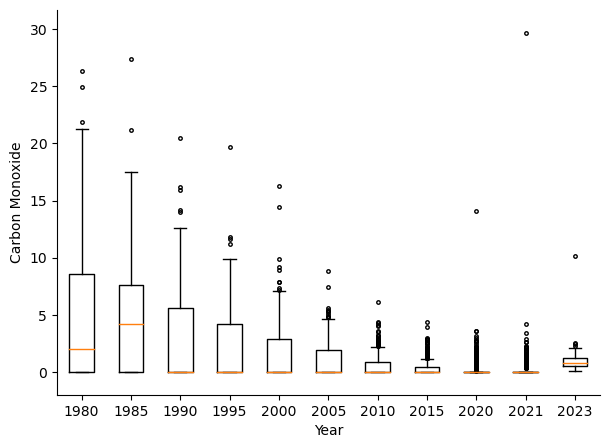

In [7]:
# Get data
years = list(df['Year'].unique())
data = []       # create an empty Python list; sublists will be appended for each boxplot
for year in years:
    data.append(df.loc[df['Year'] == year]['CO8-hr2ndMax'])
data_min = min([min(sublist) for sublist in data])  # this and the following 3 lines automatically size the graph to the data 
data_max = max([max(sublist) for sublist in data])  # while providing buffer space

fig, ax = plt.subplots()
ax.boxplot(data, flierprops={'marker': '.', 'markersize': 5}) #make outlier dots smaller so it is less clunky

""" Alternate method for adjusting the figure size """
fig.set_figheight(5)
fig.set_figwidth(7)

''' Adjust other details '''
ax.set_ylim(data_min - 2, data_max + 2)
ax.set_xticks(range(1,len(years)+1))
ax.set_xticklabels(years)
ax.set_ylabel('Carbon Monoxide')
ax.set_xlabel('Year')


# Reduce clutter
ax.xaxis.set_tick_params(which = 'both', top = False, bottom = True, labelbottom = True)  # Turn top x axis tick marks off 
ax.yaxis.set_tick_params(which = 'both', right = False, left = True, labelleft = True)   # Turn right y axis tick marks off
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [46]:
df_rochester = df[df['CBSA']=='Missoula MT']
df_richmond = df[df['CBSA']=='Richmond VA']
df_rochester.describe()

,Year,CO1-hr2ndMax,CO8-hr2ndMax,NO298th%ile,NO2AnnualMean,O3 1-hr2nd Max,O3 8-hr4th Max,SO299th %ile,SO2 24-hr2nd Max,SO2AnnualMean,PM2.598th %ile,PM2.5Wtd.Mean,PM10 24-hr2nd Max,PM10Annual Mean,Lead Max3-Mo. Avg
count,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,10.0,10.0,10.0,10.000000,10.000000,10.00000,10.000000,10.0
mean,2002.100000,6.820000,4.840000,0.0,0.700000,0.025000,0.022900,0.0,0.0,0.0,27.900000,6.570000,89.50000,18.200000,0.0
std,14.517805,7.387948,4.918265,0.0,2.213594,0.032404,0.029715,0.0,0.0,0.0,25.579723,5.799626,66.68708,10.726913,0.0
min,1980.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.0
25%,1991.250000,0.650000,0.550000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,55.75000,16.250000,0.0
50%,2002.500000,4.600000,3.450000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,35.500000,9.100000,82.50000,20.000000,0.0
75%,2013.750000,11.500000,7.725000,0.0,0.000000,0.060000,0.054750,0.0,0.0,0.0,47.500000,11.025000,126.25000,26.750000,0.0
max,2021.000000,22.800000,14.700000,0.0,7.000000,0.070000,0.065000,0.0,0.0,0.0,67.000000,13.400000,196.00000,29.000000,0.0


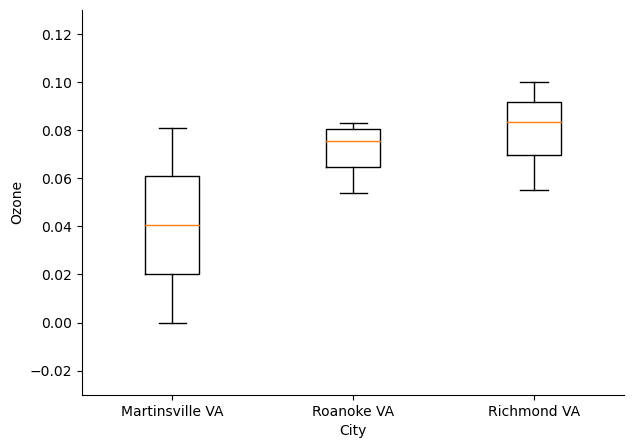

In [27]:
#Ozone
cities = ['Martinsville VA', 'Roanoke VA', 'Richmond VA']
data = []       # create an empty Python list; sublists will be appended for each boxplot
for city in cities:
    data.append(df.loc[df['CBSA'] == city]['O3 8-hr4th Max'])
data_min = min([min(sublist) for sublist in data])  # this and the following 3 lines automatically size the graph to the data 
data_max = max([max(sublist) for sublist in data])  # while providing buffer space

fig, ax = plt.subplots()
ax.boxplot(data, flierprops={'marker': '.', 'markersize': 5}) #make outlier dots smaller so it is less clunky

""" Alternate method for adjusting the figure size """
fig.set_figheight(5)
fig.set_figwidth(7)

''' Adjust other details '''
ax.set_ylim(data_min - .03, data_max + .03)
ax.set_xticks(range(1,len(cities)+1))
ax.set_xticklabels(cities)
ax.set_ylabel('Ozone')
ax.set_xlabel('City')


ax.xaxis.set_tick_params(which = 'both', top = False, bottom = True, labelbottom = True)  # Turn top x axis tick marks off 
ax.yaxis.set_tick_params(which = 'both', right = False, left = True, labelleft = True)   # Turn right y axis tick marks off
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [47]:
city1 = 'Los Angeles-Long Beach-Anaheim CA'
city2 = 'Missoula MT'

In [58]:
df.loc[(df['CBSA'] == city1)&(df['Year'] <= 2021)]['Year']

156     1980
472     1985
825     1990
1257    1995
1733    2000
2207    2005
2696    2010
3177    2015
3655    2020
4136    2021
Name: Year, dtype: int64

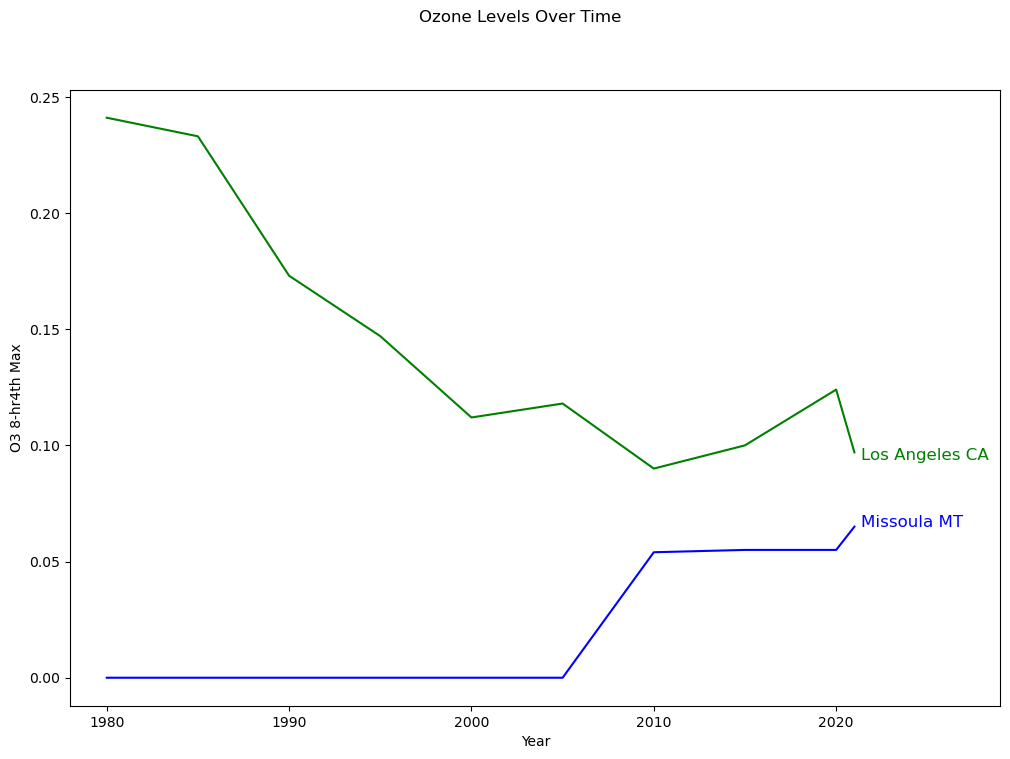

In [77]:
#Ozone
var = 'O3 8-hr4th Max'
fig, ax = plt.subplots()
ax.plot(df.loc[(df['CBSA'] == city1)&(df['Year'] <= 2021)]['Year'],df.loc[(df['CBSA'] == city1)&(df['Year'] <= 2021)][var], color = 'green', label = city1)
ax.plot(df.loc[df['CBSA'] == city2]['Year'],df.loc[df['CBSA'] == city2][var], color = 'blue', label = city2)
#ax.plot(df.loc[df['CBSA'] == 'Martinsville VA']['Year'],df.loc[df['CBSA'] == 'Martinsville VA']['O3 8-hr4th Max'], color = 'red', label = 'Martinsville VA')
fig.suptitle('Ozone Levels Over Time')
ax.set_xlim(1978,2029)   # this leaves some room on the right for the text labels
ax.set_xlabel('Year')
ax.set_ylabel(var)
#ax.axvspan(4,7,color = 'grey', alpha = 0.2) #shading
fig.set_size_inches(12,8)
''' loc controls location of legend '''
''' https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html '''
ax.text(0.85,0.40,'Los Angeles CA', fontsize = 12, color = 'green', transform=ax.transAxes) #labels at end of lines, coordinate or % placing
ax.text(0.85,0.29,city2, fontsize = 12, color = 'blue', transform=ax.transAxes)
plt.show()

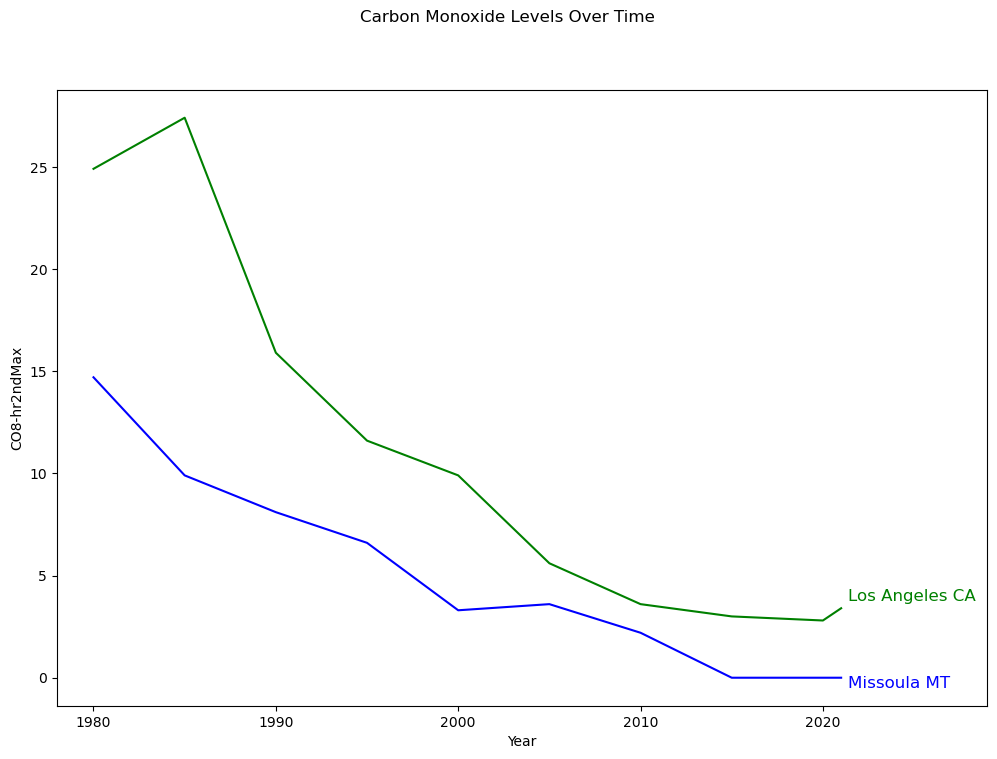

In [76]:
#Carbon Monoxide
var = 'CO8-hr2ndMax'
fig, ax = plt.subplots()
ax.plot(df.loc[(df['CBSA'] == city1)&(df['Year'] <= 2021)]['Year'],df.loc[(df['CBSA'] == city1)&(df['Year'] <= 2021)][var], color = 'green', label = city1)
ax.plot(df.loc[df['CBSA'] == city2]['Year'],df.loc[df['CBSA'] == city2][var], color = 'blue', label = city2)
#ax.plot(df.loc[df['CBSA'] == 'Martinsville VA']['Year'],df.loc[df['CBSA'] == 'Martinsville VA']['O3 8-hr4th Max'], color = 'red', label = 'Martinsville VA')
fig.suptitle('Carbon Monoxide Levels Over Time')
ax.set_xlim(1978,2029)   # this leaves some room on the right for the text labels
ax.set_xlabel('Year')
ax.set_ylabel(var)
#ax.axvspan(4,7,color = 'grey', alpha = 0.2) #shading
fig.set_size_inches(12,8)
''' loc controls location of legend '''
''' https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html '''
ax.text(0.85,0.17,'Los Angeles CA', fontsize = 12, color = 'green', transform=ax.transAxes) #labels at end of lines, coordinate or % placing
ax.text(0.85,0.03,city2, fontsize = 12, color = 'blue', transform=ax.transAxes)
plt.show()


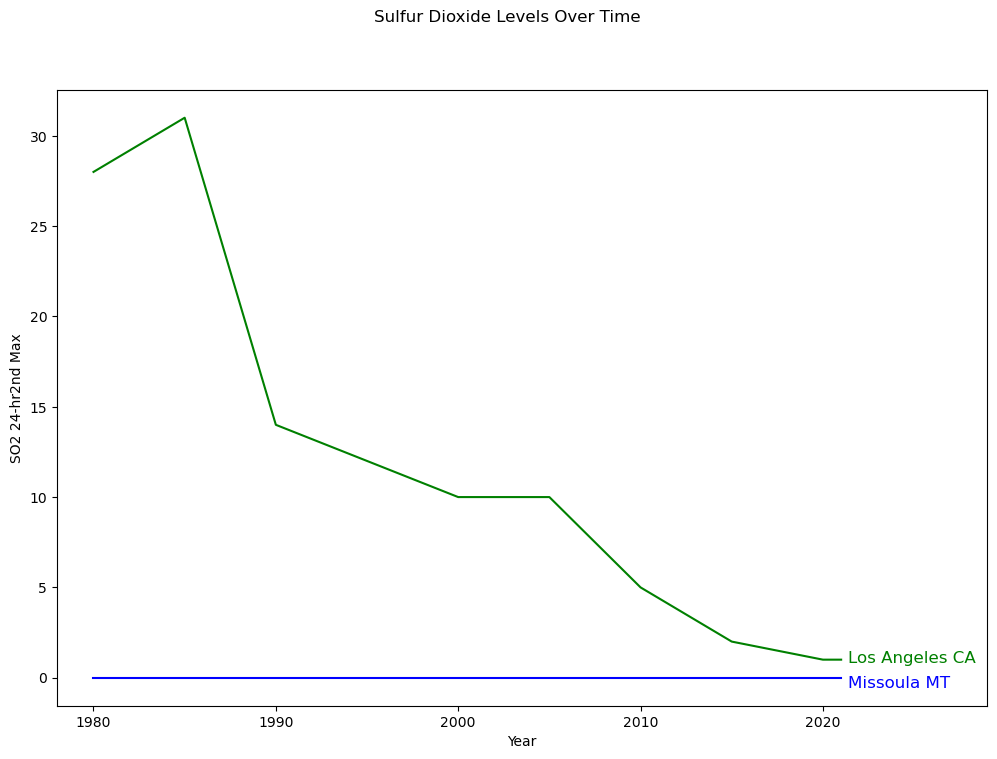

In [75]:
#Sulfur Dioxide
var = 'SO2 24-hr2nd Max'
fig, ax = plt.subplots()
ax.plot(df.loc[(df['CBSA'] == city1)&(df['Year'] <= 2021)]['Year'],df.loc[(df['CBSA'] == city1)&(df['Year'] <= 2021)][var], color = 'green', label = city1)
ax.plot(df.loc[df['CBSA'] == city2]['Year'],df.loc[df['CBSA'] == city2][var], color = 'blue', label = city2)
#ax.plot(df.loc[df['CBSA'] == 'Martinsville VA']['Year'],df.loc[df['CBSA'] == 'Martinsville VA']['O3 8-hr4th Max'], color = 'red', label = 'Martinsville VA')
fig.suptitle('Sulfur Dioxide Levels Over Time')
ax.set_xlim(1978,2029)   # this leaves some room on the right for the text labels
ax.set_xlabel('Year')
ax.set_ylabel(var)
#ax.axvspan(4,7,color = 'grey', alpha = 0.2) #shading
fig.set_size_inches(12,8)
''' loc controls location of legend '''
''' https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html '''
ax.text(0.85,0.07,'Los Angeles CA', fontsize = 12, color = 'green', transform=ax.transAxes) #labels at end of lines, coordinate or % placing
ax.text(0.85,0.03,city2, fontsize = 12, color = 'blue', transform=ax.transAxes)
plt.show()
